# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# 1. Data Validation

## Libraries and Data Import

In [1]:
# Importing libraries & Setting Styles
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

sns.set(palette='deep')
plt.rcParams["axes.labelsize"] = 10
plt.rcParams["axes.labelpad"] = 15
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.titlepad"] = 20

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, make_scorer, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# Data Import and Exploration
recipe_site_traffic = pd.read_csv('recipe_site_traffic_2212.csv')
display(recipe_site_traffic)
display(recipe_site_traffic.info())
display(recipe_site_traffic.describe())

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN
...,...,...,...,...,...,...,...,...
942,943,1161.00,5.31,22.39,44.22,Lunch/Snacks,2,NaN
943,944,NaN,NaN,NaN,NaN,Potato,2,High
944,945,951.74,29.42,3.57,13.87,Pork,2,High
945,946,266.61,35.77,0.97,8.07,Potato,6,High


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


None

,recipe,calories,carbohydrate,sugar,protein
count,947.000000,895.000000,895.000000,895.000000,895.000000
mean,474.000000,435.939196,35.069676,9.046547,24.149296
std,273.519652,453.020997,43.949032,14.679176,36.369739
min,1.000000,0.140000,0.030000,0.010000,0.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000
50%,474.000000,288.550000,21.480000,4.550000,10.800000
75%,710.500000,597.650000,44.965000,9.800000,30.200000
max,947.000000,3633.160000,530.420000,148.750000,363.360000


## Data Cleanup and Handling Null Values

In [3]:
# Setting high_traffic Column values to boolean
# 1 = High Traffic, 0 = Low Traffic
recipe_site_traffic['high_traffic'] = np.where(recipe_site_traffic['high_traffic']=='High',1,0)

In [4]:
# Checking Null Values in Percentage
np.round(100*(recipe_site_traffic.isnull().sum()/len(recipe_site_traffic)),4)

recipe          0.000
calories        5.491
carbohydrate    5.491
sugar           5.491
protein         5.491
category        0.000
servings        0.000
high_traffic    0.000
dtype: float64

In [5]:
# Dropping 52 Rows with Null Values
recipe_site_traffic = recipe_site_traffic.dropna()
np.round(100*(recipe_site_traffic.isnull().sum()/len(recipe_site_traffic)),4)

recipe          0.0
calories        0.0
carbohydrate    0.0
sugar           0.0
protein         0.0
category        0.0
servings        0.0
high_traffic    0.0
dtype: float64

In [6]:
# Dropping recipe Column
recipe_site_traffic = recipe_site_traffic.drop(columns=['recipe'])

In [7]:
# Making servings Column Numeric
recipe_site_traffic.servings = recipe_site_traffic.servings.str.replace(' as a snack','').astype('int64')

In [8]:
# Fixing Category Column
recipe_site_traffic.category = recipe_site_traffic.category.str.replace('Chicken Breast','Chicken')

## Data Validation Report 📒

The dataset initially contained **947 rows and 8 columns** before undergoing cleaning and validation. Each column was thoroughly validated against the specified criteria outlined in the dataset table:

- **recipe:** Unique identifier for each recipe. However, this column is not necessary for further EDA and model building, so it was dropped.
- **calories, carbohydrate, sugar, protein:** These columns indicate the amount of macronutrients in each recipe. There were 52 rows with null values in each of these columns, which were subsequently deleted.
- **category:** Recipes are listed in one of ten possible groupings ('Lunch/Snacks', 'Beverages', 'Potato', 'Vegetable', 'Meat', 'Chicken', 'Pork', 'Dessert', 'Breakfast', 'One Dish Meal'). But there was an extra category "Chicken Breast", which is now merged with "Chicken".
- **servings:** This column needed to be numeric but was initially of object type due to three rows containing text. The text was stripped out, and the column was converted to numeric.
- **high_traffic:** Initially, this column contained either 'High' or null values, which was confusing. It was converted to binary, with 1 indicating high traffic and 0 indicating low traffic. This will be our target column in our models.

After completing the data validation process, the dataset now consists of **895 rows and 7 columns**, with no missing values present.


# 2. Exploratory Analysis
## Characterstics of Data

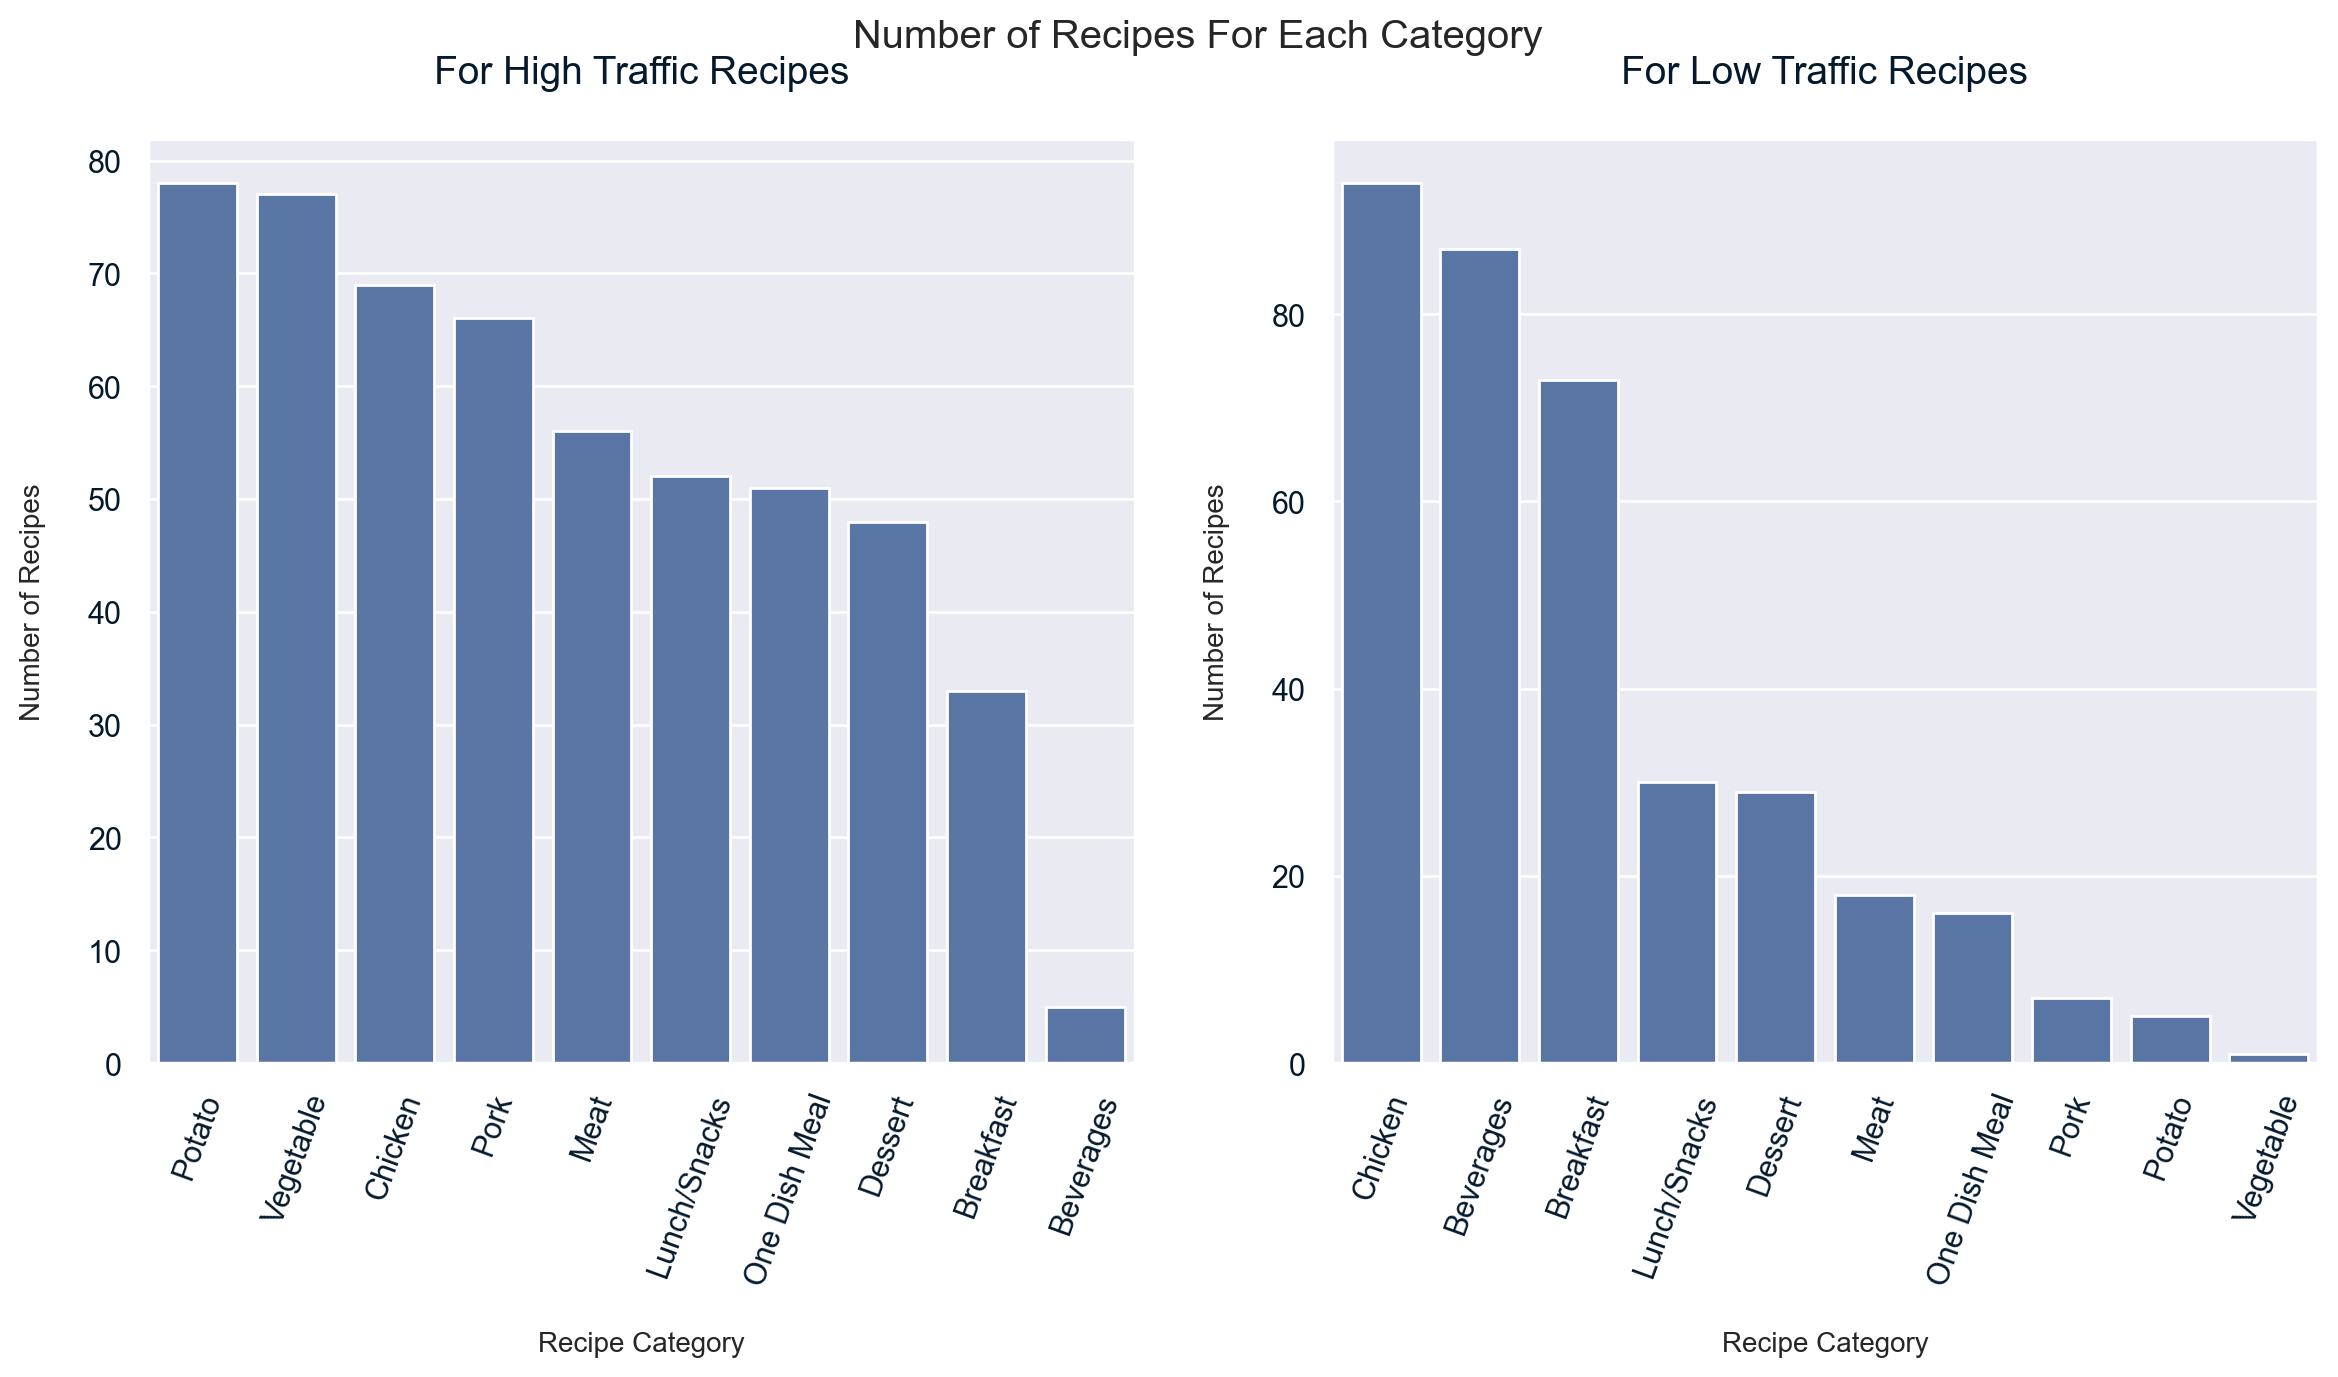

In [9]:
# Graph of Number of Recipes For Each Category
high_traffic_recipes = recipe_site_traffic[recipe_site_traffic['high_traffic']==1]
low_traffic_recipes = recipe_site_traffic[recipe_site_traffic['high_traffic']==0]
categories_high = high_traffic_recipes['category'].value_counts()
categories_low = low_traffic_recipes['category'].value_counts()

fig, ax21 = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=categories_high.index, y=categories_high.values, ax=ax21[0])
ax21[0].set_xticklabels(ax21[0].get_xticklabels(), rotation=70)
sns.barplot(x=categories_low.index, y=categories_low.values, ax=ax21[1])
ax21[1].set_xticklabels(ax21[1].get_xticklabels(), rotation=70)

# Setting titles
fig.suptitle("Number of Recipes For Each Category")
ax21[0].set_title("For High Traffic Recipes")
ax21[1].set_title("For Low Traffic Recipes")

# Setting x and y labels
ax21[0].set_xlabel("Recipe Category")
ax21[0].set_ylabel("Number of Recipes")
ax21[1].set_xlabel("Recipe Category")
ax21[1].set_ylabel("Number of Recipes")

plt.show()

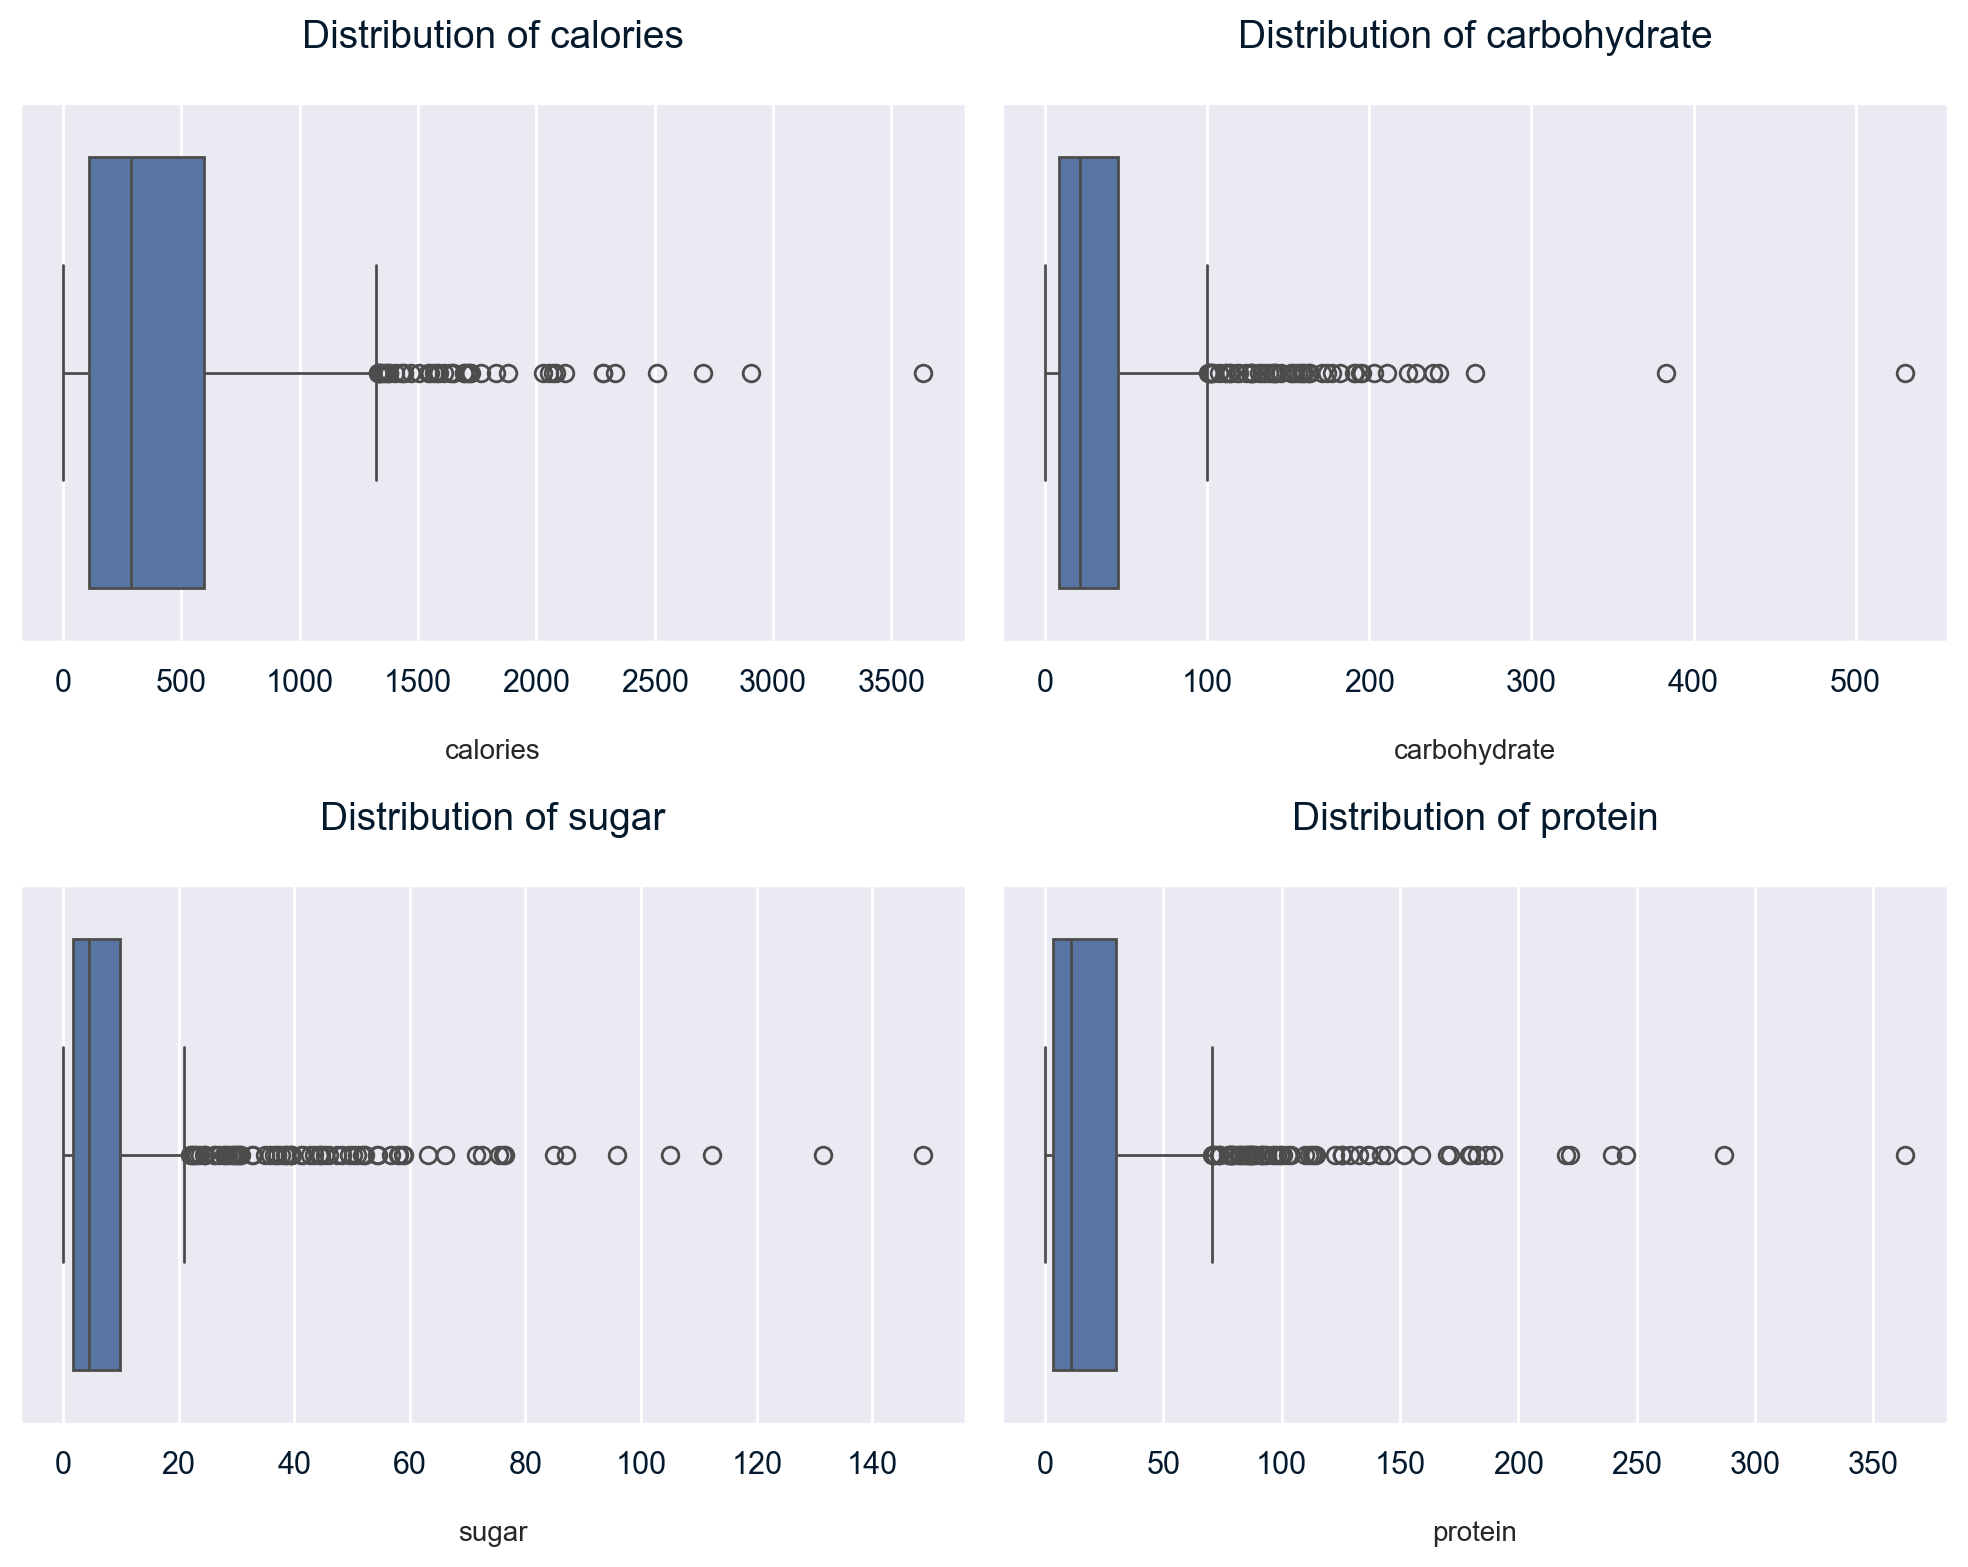

In [10]:
# Distrbution of 'calories', 'carbohydrate', 'sugar', 'protein'
fig, ax22 = plt.subplots(2, 2, figsize=(10, 8))
ax22 = ax22.flatten()

columns = ['calories', 'carbohydrate', 'sugar', 'protein']

# Plot each boxplot
for i, col in enumerate(columns):
    sns.boxplot(data=recipe_site_traffic, x=col, ax=ax22[i])
    ax22[i].set_title(f'Distribution of {col}')

# Adjust layout
plt.tight_layout()
plt.show()

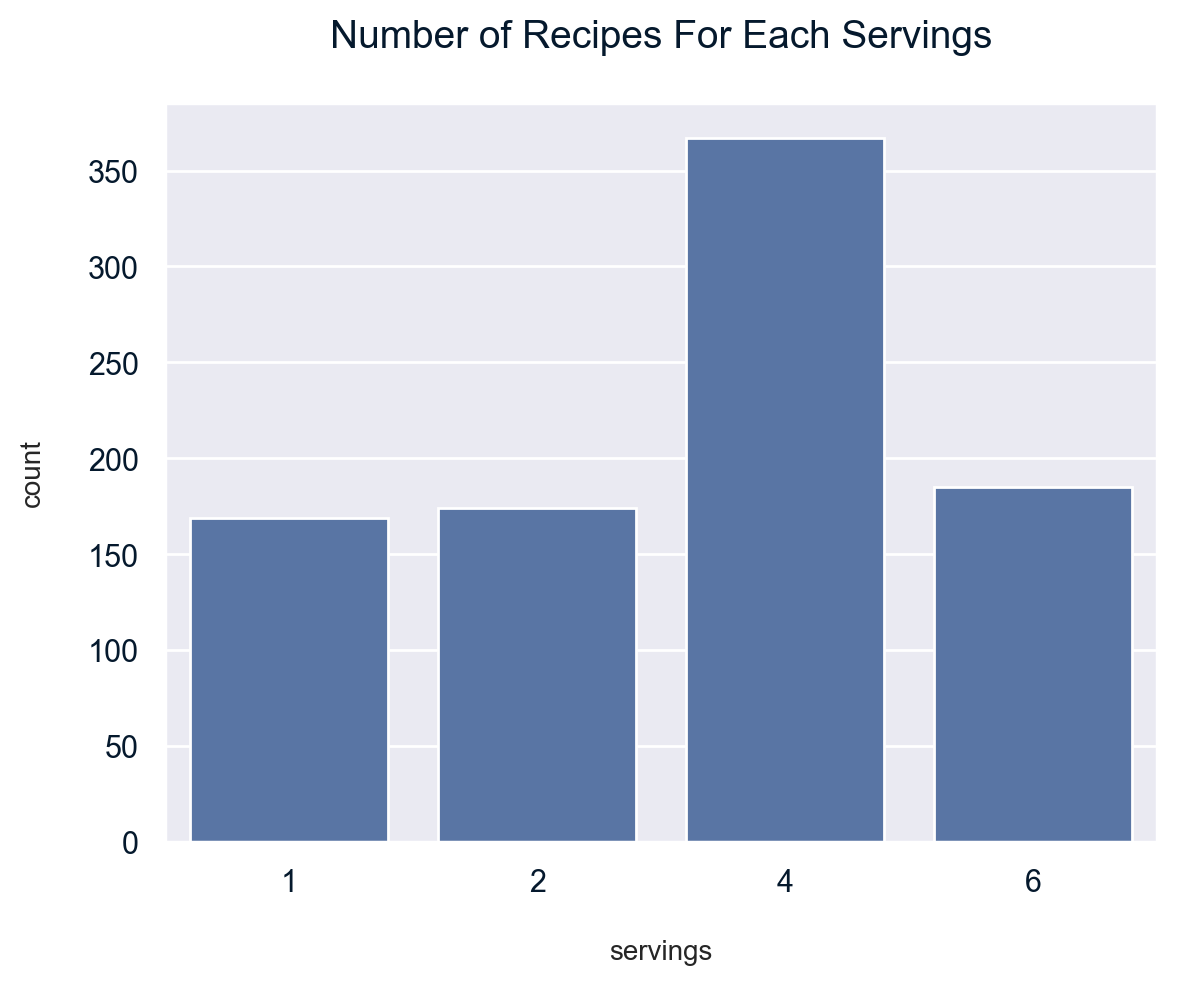

In [11]:
# recipe_site_traffic['servings'].value_counts()
sns.countplot(data=recipe_site_traffic, x='servings')
plt.title('Number of Recipes For Each Servings')
plt.show()

## Relationship between Data

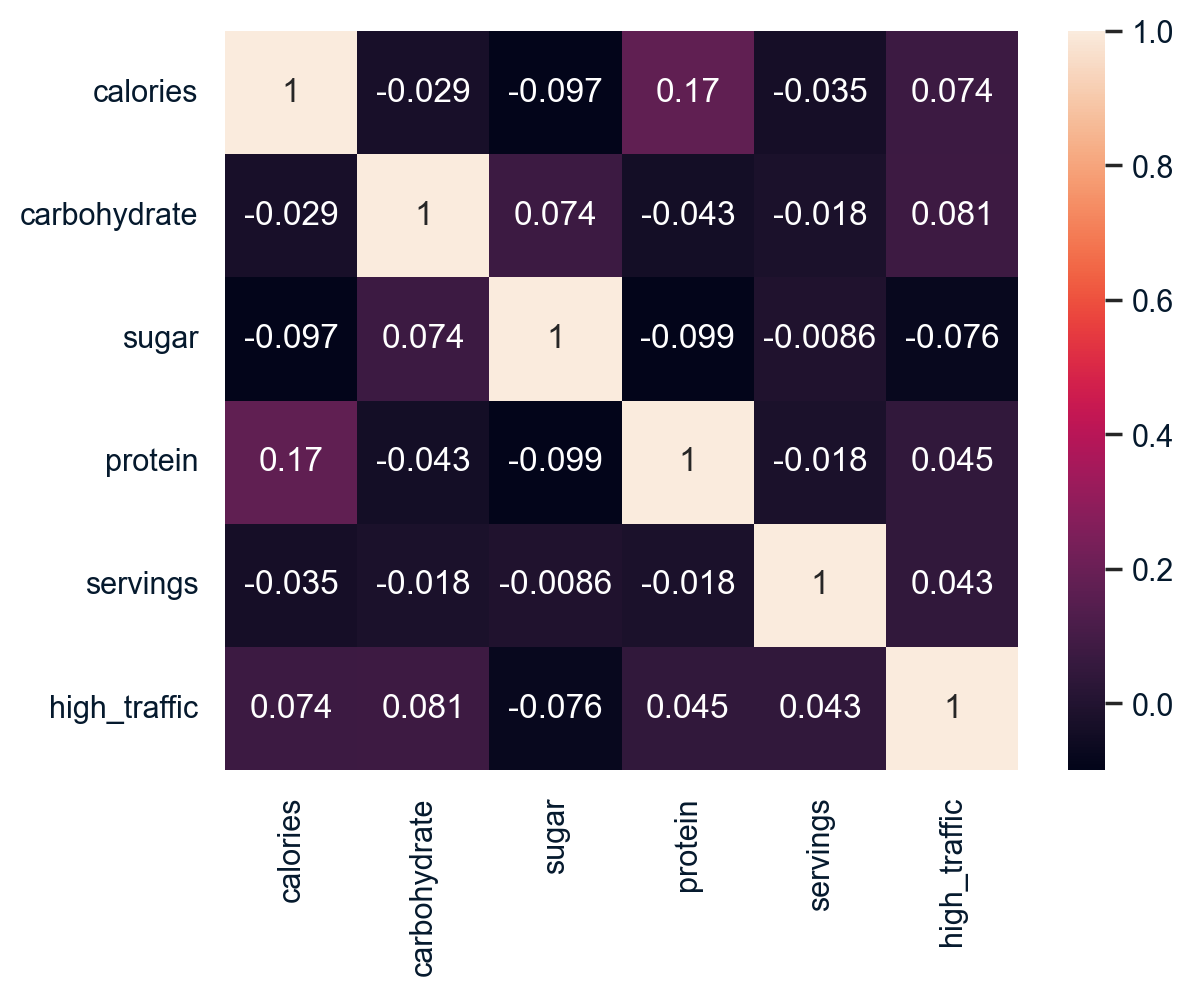

In [12]:
sns.heatmap(recipe_site_traffic.corr(),annot=True)
plt.show()

## EDA Report 📒

We have observed that traffic to the rest of the website increases by up to 40% when a popular recipe is selected. Our goal is to identify the recipes that generate high traffic.

Our analysis reveals that recipes from the categories 'Potato', 'Vegetable', 'Chicken' and 'Pork' are most prevalent among high traffic recipes. Conversely, 'Chicken', 'Beverages', and 'Breakfast' are the most common among low traffic recipes.

</br></br>![image21](image21.png)</br></br>

We then examined the distribution of micronutrient amounts across the entire dataset. The distributions for these nutrients exhibit a similar right-skewed pattern with a few outliers. This skewness indicates that the majority of recipes contain relatively low amounts of these nutrients, with only a few recipes having very high values.

</br></br>![image22](image22.png)</br></br>

Furthermore, the distribution analysis of the servings column reveals that servings of 4 are nearly twice as common as any other serving size, while the other serving sizes are relatively equal.

</br></br>![image23](image23.png)</br></br>

Finally, we analyzed the correlation among all numeric variables. The correlation graph suggests minimal correlation between these variables. This implies that the variables are relatively independent of each other and do not exhibit strong linear relationships.

</br></br>![image24](image24.png)</br></br>


# 3. Model Development

Our objective is to address a binary classification problem where we need to identify recipes that generate high traffic, which can then be displayed prominently on the homepage. This task involves predicting whether a given recipe will bring high traffic based on its features.

**Logistic Regression:** For our baseline model, we selected **Logistic Regression**. Logistic Regression is a suitable choice for binary classification problems due to its simplicity and interpretability. It provides a clear understanding of the relationship between the features and the probability of the positive class. This model serves as a benchmark to evaluate the performance of more complex models.

**Linear Support Vector Machine (SVM)** To compare with the baseline model, we employed the **SVM**. Linear SVM is a powerful classification algorithm that finds the optimal hyperplane separating the classes with the maximum margin. It is effective in high-dimensional spaces and can be particularly useful when the decision boundary is linear. Linear SVM is known for its ability to handle large datasets efficiently and is often used for its strong performance in binary classification tasks.

By evaluating these models, we can assess their performance in predicting high traffic recipes. The Logistic Regression model will provide insights into the basic predictive capability, while the Linear SVM will offer a comparison with its ability to find an optimal decision boundary and handle feature interactions.

## Data Preprocessing


In [13]:
# Getting Data Ready For Model Training
df = recipe_site_traffic.copy()

# One-Hot Code Encoding
df = pd.get_dummies(df, drop_first=True)
X = df.drop(columns=['high_traffic'])
y = df['high_traffic']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Training

In [14]:
results = []

### Logistic Regression

In [15]:
lr_model = LogisticRegression(random_state=42, class_weight='balanced')
lr_model.fit(X_train_scaled,y_train)
y_pred = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, y_pred)
lr_f1 = f1_score(y_test, y_pred)
lr_auc = roc_auc_score(y_test, y_pred)
lr_precision_1 = precision_score(y_test, y_pred , pos_label=1)

print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
print(classification_report(y_test, y_pred, digits=4))

results.append(['Logistic Regression', lr_accuracy, lr_f1, lr_auc, lr_precision_1])

Confusion Matrix:
[[52 21]
 [23 83]]

              precision    recall  f1-score   support

           0     0.6933    0.7123    0.7027        73
           1     0.7981    0.7830    0.7905       106

    accuracy                         0.7542       179
   macro avg     0.7457    0.7477    0.7466       179
weighted avg     0.7554    0.7542    0.7547       179



### Linear SVM

In [16]:
lsvm_model = LinearSVC(random_state=42, class_weight='balanced')
lsvm_model.fit(X_train_scaled,y_train)
y_pred = lsvm_model.predict(X_test_scaled)
lsvm_accuracy = accuracy_score(y_test, y_pred)
lsvm_f1 = f1_score(y_test, y_pred)
lsvm_auc = roc_auc_score(y_test, y_pred)
lsvm_precision_1 = precision_score(y_test, y_pred , pos_label=1)

print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
print(classification_report(y_test, y_pred, digits=4))

results.append(['Linear SVM', lsvm_accuracy,lsvm_f1, lsvm_auc, lsvm_precision_1])

Confusion Matrix:
[[52 21]
 [22 84]]

              precision    recall  f1-score   support

           0     0.7027    0.7123    0.7075        73
           1     0.8000    0.7925    0.7962       106

    accuracy                         0.7598       179
   macro avg     0.7514    0.7524    0.7518       179
weighted avg     0.7603    0.7598    0.7600       179



## Hyperparameter Tuning Models

In [17]:
hypertuned_results = []

In [18]:
model = LinearSVC(random_state=42, class_weight='balanced')
precision_scorer = make_scorer(precision_score, pos_label=1)

param_distributions = {
    'C': np.logspace(-4, 4, 50),  # Regularization strength
    'loss': ['hinge', 'squared_hinge'],  # Loss function
    'penalty': ['l1', 'l2'],  # Penalty norm (note: 'l1' is not supported for 'hinge')
    'dual': [True, False],  # Dual or primal formulation
    'tol': np.logspace(-6, -1, 20)  # Tolerance for stopping criteria
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, scoring=precision_scorer, 
                                n_iter=50, cv=10, n_jobs=-1, verbose=0, random_state=42)
random_search.fit(X_train_scaled, y_train)
best_params_LSVC = random_search.best_params_
print(f"Best Parameters: {best_params_LSVC}")

# best_params_LSVC = {'tol': 6.951927961775606e-05, 'penalty': 'l1', 'loss': 'squared_hinge', 'dual': False, 'C': 0.009102981779915217}

Best Parameters: {'tol': 6.951927961775606e-05, 'penalty': 'l1', 'loss': 'squared_hinge', 'dual': False, 'C': 0.009102981779915217}


In [19]:
best_model = LinearSVC(**best_params_LSVC,random_state=42, class_weight='balanced')
best_model.fit(X_train_scaled,y_train)
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
precision_1 = precision_score(y_test, y_pred , pos_label=1)

print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
print(classification_report(y_test, y_pred, digits=4))

hypertuned_results.append(['Linear SVM', accuracy, f1, auc, precision_1])

Confusion Matrix:
[[64  9]
 [40 66]]

              precision    recall  f1-score   support

           0     0.6154    0.8767    0.7232        73
           1     0.8800    0.6226    0.7293       106

    accuracy                         0.7263       179
   macro avg     0.7477    0.7497    0.7262       179
weighted avg     0.7721    0.7263    0.7268       179



In [20]:
model = LogisticRegression(random_state=42, class_weight='balanced')

param_distributions = {
    'C': np.logspace(-6, 6, 100),  # More values for regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Different types of regularization
    'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg'],  # Different solvers
    'tol': np.logspace(-7, -1, 20),  # More granular tolerance values
    'fit_intercept': [True, False],  # Whether to fit the intercept
    'intercept_scaling': np.linspace(0.1, 3, 30),  # Expanded intercept scaling factor range
    'l1_ratio': np.linspace(0, 1, 30)  # More granular ElasticNet mixing parameter (only used if penalty is 'elasticnet')
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions,  scoring=precision_scorer, 
                                n_iter=50, cv=10, n_jobs=-1, verbose=0, random_state=42)
random_search.fit(X_train_scaled, y_train)
best_params_lr = random_search.best_params_
print(f"Best Parameters: {best_params_lr}")

# best_params_lr = {'tol': 3.359818286283781e-05, 'solver': 'saga', 'penalty': 'elasticnet', 'l1_ratio': 0.0, 'intercept_scaling': 0.7, 'fit_intercept': False, 'class_weight': None, 'C': 0.0001519911082952933}

Best Parameters: {'tol': 0.0012742749857031321, 'solver': 'liblinear', 'penalty': 'l2', 'l1_ratio': 1.0, 'intercept_scaling': 2.0999999999999996, 'fit_intercept': False, 'C': 7.0548023107186455e-06}


In [21]:
best_model = LogisticRegression(**best_params_lr, random_state=42, class_weight='balanced')
best_model.fit(X_train_scaled,y_train)
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
precision_1 = precision_score(y_test, y_pred , pos_label=1)

print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
print(classification_report(y_test, y_pred, digits=4))

hypertuned_results.append(['Logistic Regression', accuracy,f1, auc, precision_1])

Confusion Matrix:
[[56 17]
 [31 75]]

              precision    recall  f1-score   support

           0     0.6437    0.7671    0.7000        73
           1     0.8152    0.7075    0.7576       106

    accuracy                         0.7318       179
   macro avg     0.7294    0.7373    0.7288       179
weighted avg     0.7453    0.7318    0.7341       179



# 4. Model Evaluation & Business Metrics

# Model Evaluation Metrics

To assess the performance of our models, we focus on four key evaluation metrics:

1. **Overall Accuracy**: This metric provides an indication of the model's general effectiveness in classification. It reflects how well the model performs across all classes.

2. **F1-Score**: This metric is the harmonic mean of precision and recall. It provides a balance between the precision and the recall of the model, offering a single metric to understand how well the model performs in terms of both false positives and false negatives.

3. **ROC-AUC Score**: The ROC-AUC score measures the model's ability to distinguish between classes. A higher ROC-AUC score indicates a better performance of the model in differentiating between high traffic and low traffic recipes.

4. **Precision Score of Class 1 (Business Metric)**: In our context, Class 1 represents high traffic recipes. The Precision score for Class 1 measures the accuracy of the model in correctly identifying high traffic recipes among those it classifies as high traffic.

To achieve our goal of boosting website traffic and subscriptions, it's crucial that our model correctly predicts high-traffic recipes with at least 80% Precision for Class 1. Precision measures how many of the recipes flagged as high-traffic actually drive significant traffic, which has been observed to increase by up to 40% on the rest of the site. By focusing on Precision, we ensure that the recipes featured on our homepage effectively contribute to higher traffic and more subscriptions, aligning our model's performance with our business objectives.

The insights gained from these metrics will guide us in selecting the most effective approach for identifying high traffic recipes, ultimately optimizing the choice of recipes displayed on the homepage.

In [22]:
# Base Models
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy','f1-score','ROC-AUC Score', 'Precision for Class 1'])
display(results_df.sort_values(by='Precision for Class 1',ascending=False))

,Model,Accuracy,f1-score,ROC-AUC Score,Precision for Class 1
1,Linear SVM,0.759777,0.796209,0.752391,0.800000
0,Logistic Regression,0.754190,0.790476,0.747674,0.798077


In [23]:
# Hypertuned Models
hypertuned_results_df = pd.DataFrame(hypertuned_results, columns=['Model', 'Accuracy','f1-score','ROC-AUC Score', 'Precision for Class 1'])
display(hypertuned_results_df.sort_values(by='Precision for Class 1',ascending=False))

,Model,Accuracy,f1-score,ROC-AUC Score,Precision for Class 1
0,Linear SVM,0.726257,0.729282,0.749677,0.880000
1,Logistic Regression,0.731844,0.757576,0.737335,0.815217


## Evaluation Report 📒

From the evaluation results, we observe the following:

- **Linear SVM**: This model demonstrated the highest precision for Class 1, achieving 80% precision before hyperparameter tuning and 88% after tuning. However, this improvement in precision came at the cost of overall accuracy, which dropped to 72.63% post-tuning. The F1-score also decreased from 0.7962 to 0.7293, and the ROC-AUC score remained fairly consistent, changing from 0.7524 to 0.7497.

- **Logistic Regression**: This model initially achieved a precision of 79.81% for Class 1. After hyperparameter tuning, the precision improved to 81.52%, matching the pre-tuning performance of Linear SVM. The overall accuracy of the Logistic Regression model was 75.42% before tuning and 73.18% after tuning. The F1-score decreased from 0.7905 to 0.7576, and the ROC-AUC score remained stable, changing from 0.7477 to 0.7373.


Given the trade-off between precision and overall accuracy for the Linear SVM, it is not advisable to use this model despite its higher precision. Logistic Regression (Post-Tuning) appears to be the better choice overall. It offers a good balance of precision (81.52%) and F1-score (0.7576), and while its accuracy is slightly lower than the pre-tuning Linear SVM, it does not have the significant drop observed with the post-tuning Linear SVM. Additionally, the F1-score and ROC-AUC score indicate a more balanced performance. Linear SVM (Pre-Tuning) could be considered if precision for Class 1 is the top priority and you can tolerate slightly lower accuracy and F1-score.


# 5. Final Summary

## Key Findings

* **Recipe Categories:** Recipes from 'Potato', 'Vegetable', 'Chicken', and 'Pork' categories tend to drive higher traffic. Conversely, recipes from 'Chicken', 'Beverages', and 'Breakfast' categories are associated with lower traffic.
* **Nutrient Distribution:** Micronutrient levels in recipes are right-skewed, with most recipes having low nutrient content and a few with very high values.
* **Serving Sizes:** The distribution analysis of servings reveals that servings of 4 are nearly twice as common as any other serving size, while the other serving sizes are relatively equal.
* **Feature Correlation:** There is minimal correlation between numeric variables, suggesting that these features are relatively independent of each other.
* **Model Performance:** 
  - **Linear SVM:** Achieved high precision for Class 1 (high traffic) at 80% before tuning and 88% after tuning. However, this came at the expense of overall accuracy (72.63% post-tuning) and a decreased F1-score (0.7293). The ROC-AUC score was relatively stable.
  - **Logistic Regression:** Initially had a precision of 79.81% for Class 1, improving to 81.52% after tuning. Overall accuracy was 75.42% before tuning and 73.18% after tuning. The F1-score decreased to 0.7576, while the ROC-AUC score showed minor changes.

## Recommendations

Based on the analysis, we recommend the following actions:

* **Prioritize Recipe Categories:** Focus on promoting recipes from 'Potato', 'Vegetable', 'Chicken', and 'Pork' categories to potentially enhance website traffic.

* **Consider Nutrient Content:** Although nutrient distribution did not show strong correlations with traffic, exploring recipes with specific nutrient profiles within high-traffic categories could be beneficial.

* **Implement Predictive Model:** Deploy the hyperparameter-tuned Logistic Regression model, which provides a better balance of precision (81.52%) and overall accuracy compared to the Linear SVM model. The Logistic Regression model also offers a more stable F1-score and ROC-AUC score.

* **Monitor and Refine:** Continuously track the performance of the chosen model and refine it with new data. Explore additional features or machine learning algorithms to further enhance prediction accuracy.

* **Homepage Optimization:** Utilize the model's predictions to prioritize high-traffic recipes on the homepage. This strategy has the potential to significantly boost overall website traffic and subscriptions.


## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation